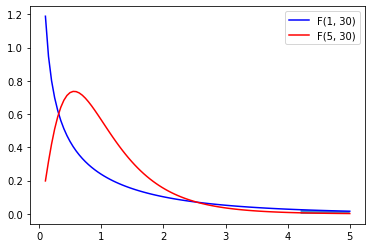

In [1]:
import numpy as np
from scipy.stats import f 
import matplotlib.pyplot as plt 
%matplotlib inline
fvalues = np.linspace(.1, 5, 100)
# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# cdf(x, df1, df2): Cumulative distribution function of F. # ie.
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)
# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F. 
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95
# sf(x, df1, df2): Survival function (1 - cdf) at x of F. 
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert proba_at_f_inf_3 + proba_at_f_sup_3 == 1
# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),alpha=.8, label="P < 0.05")
plt.show()


In [2]:
import numpy as np
x= [ 1.83,  1.83,  1.73,  1.82,  1.83,  1.73,  1.99,  1.85,  1.68,  1.87]
xbar = np.mean(x) # sample mean
mu0 = 1.75 # hypothesized value
s = np.std(x, ddof=1) # sample standard deviation 
n = len(x) # sample size
tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

2.3968766311585883


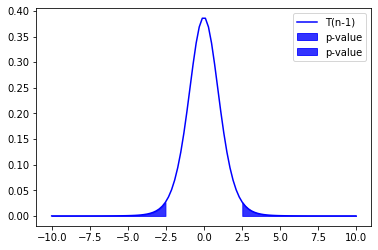

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
#tobs = 2.39687663116 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
lower_tval_tvalues = tvalues[tvalues < -tobs]


plt.fill_between(lower_tval_tvalues, 0, stats.t.pdf(lower_tval_tvalues, n-1), alpha=.8, label="p-value", color = 'blue') 
_ = plt.legend()

plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value", color = 'blue') 
_ = plt.legend()

In [4]:
all_values = np.concatenate((lower_tval_tvalues, upper_tval_tvalues),0)

In [5]:
import numpy as np
import scipy.stats as stats
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)
# Compute with scipy
cor, pval = stats.pearsonr(x, y)

In [6]:
cor

0.8924705119876184

In [7]:
pval

3.2481184618068285e-18

In [8]:
import scipy.stats as stats
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,
                    1.66,  1.71,  1.73,  1.64,  1.70,  1.60,  1.79,  1.73,  1.62,  1.77])
grp = np.array(["M"] * 10 + ["F"] * 10)
# Compute with scipy
print(stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
url = 'https://raw.github.com/neurospin/pystatsml/master/datasets/salary_table.csv'
salary = pd.read_csv(url)

In [10]:
salary.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


In [11]:
salary.experience.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 20])

In [12]:
salary.education.unique()

array(['Bachelor', 'Ph.D', 'Master'], dtype=object)

y = 491.486913 x + 13584.043803 , r: 0.538886 , r-squared: 0.290398 ,
p-value: 0.000112 , std_err: 115.823381 
Regression line with the scatterplot


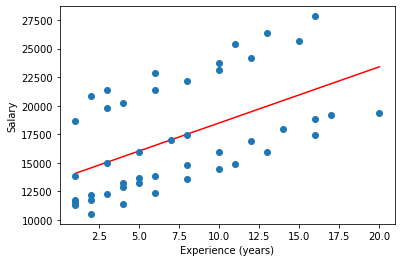

In [13]:
from scipy import stats
import numpy as np
y, x = salary.salary, salary.experience
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print("y = %f x + %f , r: %f , r-squared: %f ,\np-value: %f , std_err: %f "
      % (beta, beta0, r_value, r_value**2, p_value, std_err))
print("Regression line with the scatterplot") 
yhat = beta * x + beta0 # regression line 
plt.plot(x, yhat, 'r-', x, y,'o') 
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()


Using seaborn


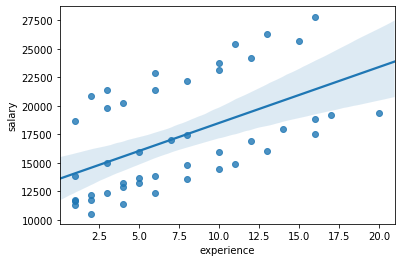

In [14]:
print("Using seaborn")
import seaborn as sns
sns.regplot(x="experience", y="salary", data=salary);

In [15]:
## Multiple Linear Regression
import numpy as np
import scipy
np.random.seed(seed=42) # make the example reproducible
# Dataset
N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))
## Our model needs an intercept so we add a column of 1s: X[:, 0] = 1
print(X[:5, :])
betastar = np.array([10, 1., .5, 0.1])
e = np.random.normal(size=N)
y = np.dot(X, betastar) + e
# Estimate the parameters
Xpinv = scipy.linalg.pinv2(X) 
betahat = np.dot(Xpinv, y) 
print("Estimated beta:\n", betahat)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
Estimated beta:
 [9.98758335 0.57627974 0.49485868 0.18871576]


In [16]:
import statsmodels.api as sm
## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())
# prediction of new values
ypred = model.predict(X)
# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              544.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):                    4.26e-38
Time:                        19:03:50   Log-Likelihood:                         -71.787
No. Observations:                  50   AIC:                                      151.6
Df Residuals:                      46   BIC:                                      159.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

AssertionError: 

In [ ]:
model.resid

In [53]:
import statsmodels.formula.api as smfrmla
df = pd.DataFrame(np.column_stack([X, y]), columns=['inter', 'x1','x2', 'x3', 'y'])

In [55]:
# Build a model excluding the intercept, it is implicit
model = smfrmla.ols("y ~ x1 + x2 + x3", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.4058
Date:                Sat, 17 Aug 2019   Prob (F-statistic):              0.750
Time:                        21:06:35   Log-Likelihood:                -167.76
No. Observations:                  50   AIC:                             343.5
Df Residuals:                      46   BIC:                             351.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8449      1.035     -0.816      0.4

In [1]:
import xgboost


In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd 
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [5]:
data['PRICE'] = boston.target
data.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]


In [9]:
data_dmatrix = xgb.DMatrix(data=X,label=data[['PRICE']]) #XBG no longer takes series as entry here

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [12]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/Users/jorgepinzon/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.397587


In [14]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [15]:
print((cv_results["test-rmse-mean"]).tail(1))


49    3.862102
Name: test-rmse-mean, dtype: float64


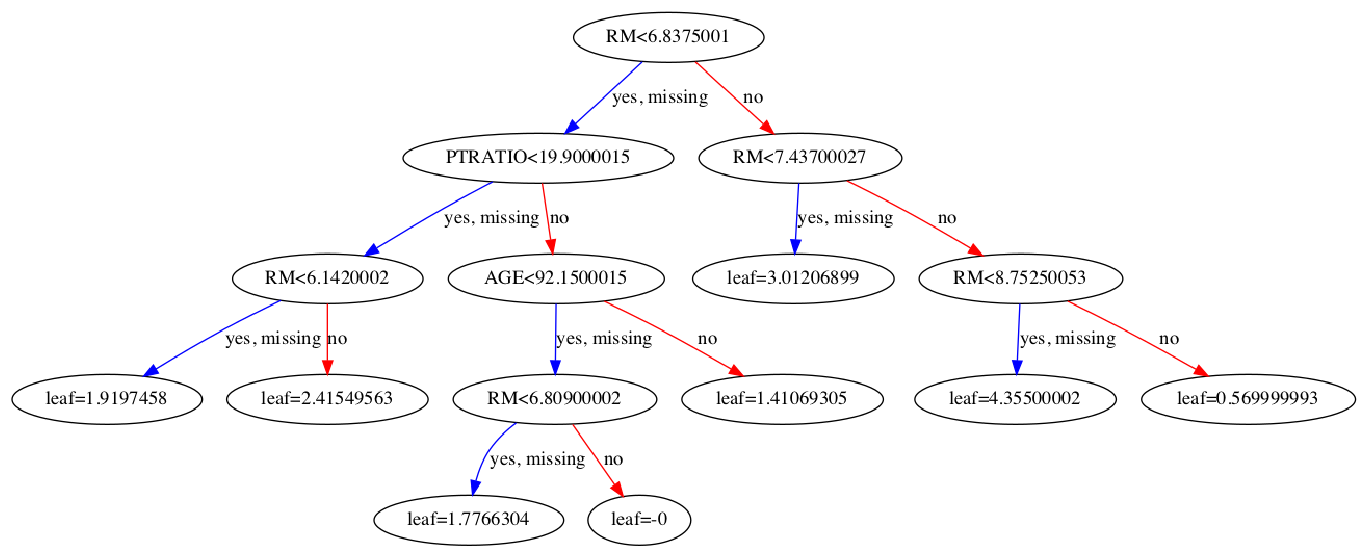

In [21]:
import matplotlib.pyplot as plt
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

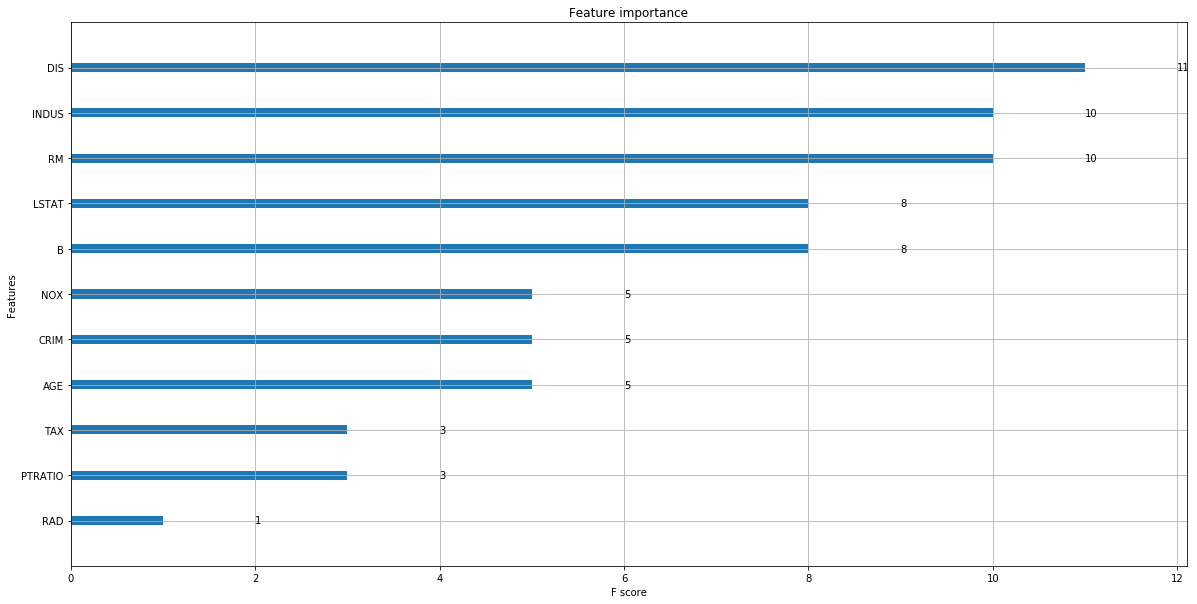

In [22]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()